#### Unsupervised Clustering. K-means algorithm.

#### k-means

- unsupervised clustering algorithm.
- grups objects into k categories based on their attributes (k is unknown, must be guessed).
- minimizes the sum of distances (e.g. euclidean) between each object and the cluster centroid.

---

- cosí germà del knn.
- els de classificació (bayes, knn, regresions x3) són classificats.
- ara els etiquetarem, cluster 1, cluster 2 (hem de mirar quants n'hi ha).

#### heuristic

- given k clusters $S=\{s_1, \dots, s_k\}$ with centroids $M=\{\mu_1, \dots, \mu_k\}$
- minimitzar els centroides dels nuvols (el centre de gravetat) de tots els punts.
- minimitzar la distancia a tots els punts. 

- each observation is assigned to the cluster $s_c$ with the closest centroid,

$
\forall\,x_{i}\in\,X\,,\;\text{centroid of}\,x_{i}\,\text{is}\;\underset{\mu_c\,\in\,M}{\arg\min}\,\|x_i-\mu_c\|^2
$
- minimize the sum of the distances from each observation to its cluster centroid

$
\underset{M}{\min}\sum_{c=1}^k\,\sum_{x_{i}\in\,s_c}\,\|x_i-\mu_c\|^2
$

- el numero de clusters li haurem de fer un guess. D'entrada ens ho hem d'imagiar. 
- donada la k (que és el número de clusters) situarem aleatoriament k centroides aleatoris. 
- començem el proccès iteratiu que acabi minimitzant les distàncies. 

#### algorithm

- randomly select k centroids
- iterate until convergence or fixed number of iterations
    - 1. for each $x_{i}\in X$:
        - find the closest centroid
        - assign $x_i$ to that cluster
    - 2. for each cluster $s_{c},\;c=\{1,\dots,k\}$:
        - update centroid: $\mu_c=\frac{1}{|s_c|}\sum_{x_i\in\,s_c}x_{i}$


#### visualization: 
https://www.youtube.com/watch?v=9nKfViAfajY

---
#### Casos reals: 
1. 
- Tema de celules que hem fet un experiment, que surtin alguns gens, tenim les mesures dels gens que surten. són datasets amb milers de dimensions. 
- Metodes per veure com s'han expresat els gens envers un farmac, injecció proteina. 
- Són celules cancerígenes i algunes se li aplica una proteina que pot inibir la seva reproducció com a celula cancerigena. 
- Tenim celules sanes, cancer, tractades, sense tractar i volem veure si amb el tractament a les celules cancerigenes
- La seva activació es diferent de les celules cancerigenes de les que no ho són
- clusters diferents
- que les celules que se li ha aplicat el tractament estàn en un altre cluster
- mes dificil d'interpretar i amb més colaboració dels experts per analitzar els resultats
- en problemes de molt alta dimensió es redueix la dimensionalitat (feature selection però no descarten directament determinades columnes sinó que busquen ... xd diu que ja ho veurem). redueixen la computació. 
---
2. 
- una ong que estudia malalties viriques (global south -> manera de parlar del tercer món). Són malalties que afecten a molta gent, com que no hi ha negoci. milions per un farmac de mozambique (les farmaceutiques no fan recerca). 
- Els hi surt més a compte estudiar malalties de la obesitat. Les ong ho investiguen. 
- Investigar farmacs per malalties viriques africanes. 
- La indústria farmaceutica, funciona, hi ha una molecula sintetizable, les empreses quimiques les poden crear a partir de atoms (crean molecules). El numero de molecules que es poden genera és de 10^24 (estrelles al univers). infinitat de molecules. 
- Aquestes molecules podríen tenir una utilitat com a farmacs per atacar un virus (com la trobes). 
- Es fan tecniques de buscar clusters dins el món de les molecules infinites, agrupacions de molecules que tenen propietats semblants, dins un grup n'hi ha una que va servir per algo real, per tant les que estan a prop seu podríen servir per alguna cosa semblant. 
- Ens centrem en un grup i investiguen que es pot fer amb aquelles.
- Això es diu screaming (generar molecules i probarles) i veure quina pot servir per algo. (les farmacèutiques normals també ho fan això). 
- Per poder fer el clustering es fan servir una serie de descriptors (1024 dimensions) abans de fer clustering contre això, es fa reduir dimensions.
- Món de foscor perque hi ha moltes dades, posar-hi una mica de llum.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set_theme()

#### generate synthetic dataset

In [2]:
# Fem servir un datasat sintetic. 
# Hi ha un model darrere d'això però no el sabem però tenim les dades, hem de mirar de trobar el model. 
# Generarà un espai de dades, unes boires. 
from sklearn.datasets import make_classification

- Amb taxonomia tens insectes i a dins tens mosques i mosquits. i a dintre tens altres.
- Sería el n_clusters_per_class.
- Busquem insectes/generes/etc (seríen núvols dintre d'altres núvols).

In [3]:
# 1000 mostres. 
# 5 dimensions. 
# n_informative = 3 són reals. 
# n_classes = són els clusters generals. 
# n_clusters_per_class = són els sub nuvolets dintre d'un nuvolet. 
# class_sep = per fixar-nos amb com de dificil sigui el problema. Com més alt, més separarà els núvols i difícil de trobar 
# n_redundant = es refereix als atribus, 3 informatius però algun redundant (ja deixa el mateix)
X, y = make_classification(n_samples = 1000, n_features = 5, n_informative = 3, n_classes = 3, n_clusters_per_class = 1, class_sep = 2.0, n_redundant = 0, random_state = 1234)
print(X.shape, y.shape)

(1000, 5) (1000,)


#### data exploration

In [4]:
df = pd.DataFrame(X, columns = ['X%d' %j for j in range(X.shape[1])])

# Com que es dataset sintetic, tenim el target. Podrem comprobar com de bé ho estem fent. 
df['target'] = y
df.head()

,X0,X1,X2,X3,X4,target
0,1.500751,-0.968596,-2.674915,-1.503111,-0.434191,0
1,1.313430,0.149235,-3.464304,-0.798513,-0.923228,0
2,2.558314,0.883846,-0.893744,-2.843854,-0.131777,0
3,2.080929,-1.042826,-2.176681,-1.855253,0.004915,0
4,-1.205049,0.618501,-1.483897,0.254683,0.490489,1


In [5]:
# Està ben balançejat.
df['target'].value_counts()

0    338
2    333
1    329
Name: target, dtype: int64

#### Visualitzem amb un scatterplot

C:\Users\jaume\miniconda3\envs\entorn_1_Jaume\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


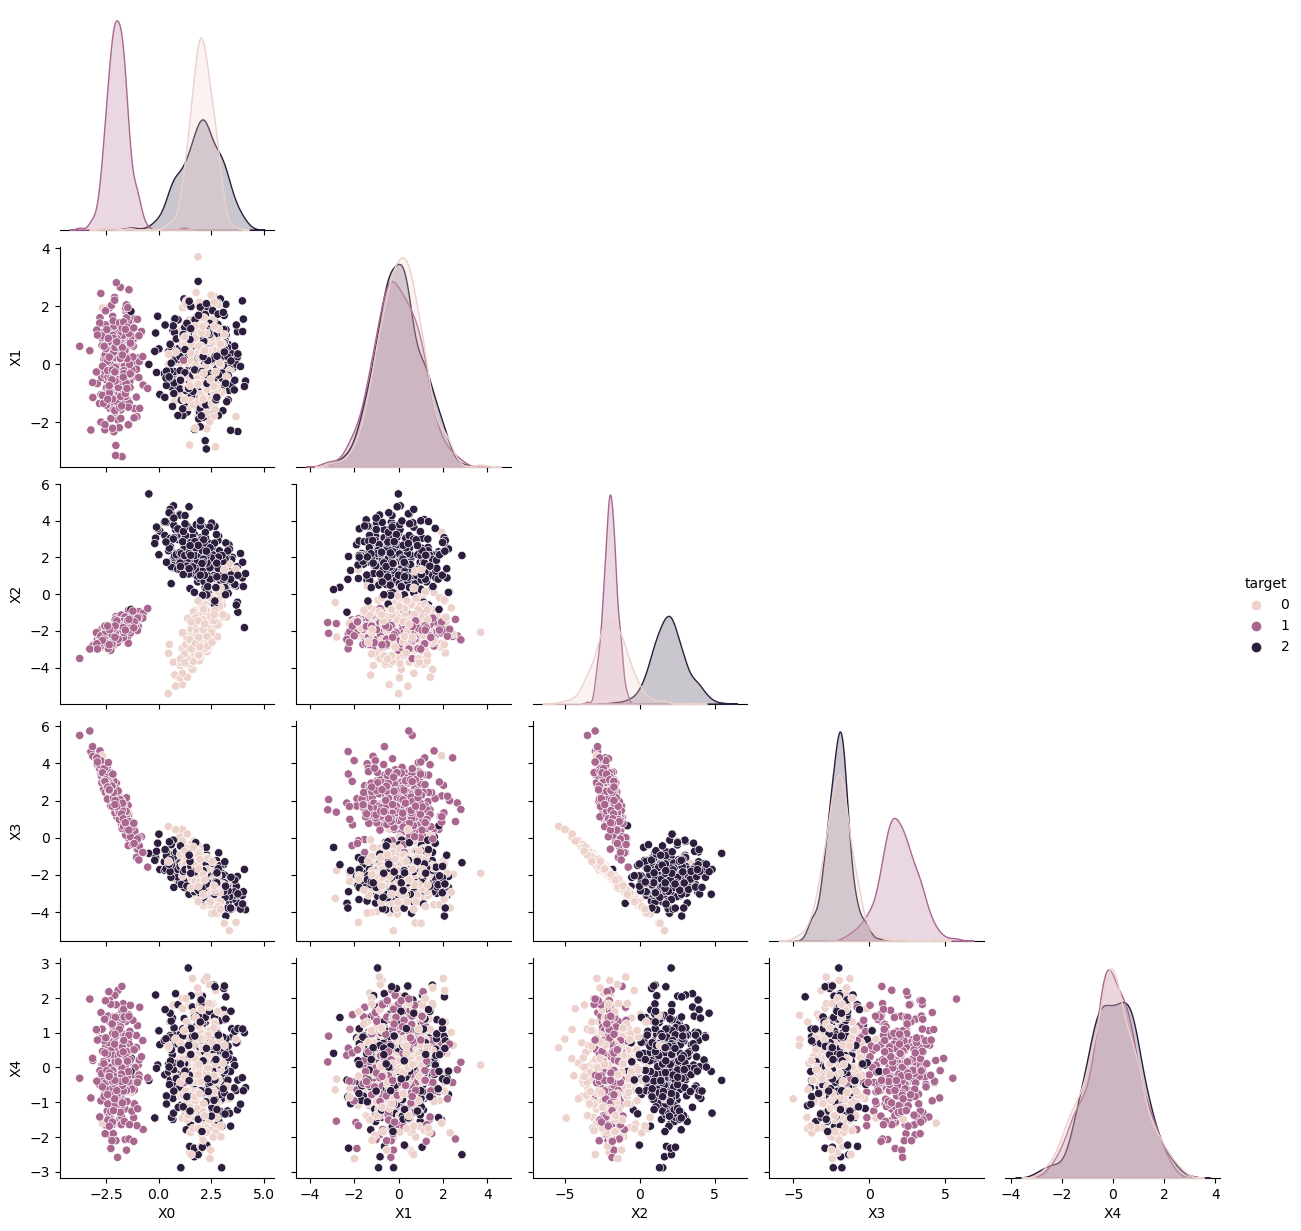

In [6]:
sns.pairplot(df, hue = 'target', corner = True)

#### Veiem: 
- Les dimensions més informatives són: 3/5. 
- Són plots dos a dos, en el segon (x2 i x0), el (x3 i x4) -> res (tot barrejat). 
- x0, x2, x1
- Solapaments a tots, però podem veure que les boires hi són. 

#### train/test split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2, random_state = 2783)

In [26]:
Xtrain

array([[-3.14560754, -0.63285673, -2.82765415,  4.90091673,  0.26342954],
       [-1.72741461,  0.73451724, -1.89797436,  1.03014066,  0.62969969],
       [-1.18398216,  1.2461349 , -1.84159083,  0.7777883 , -2.1236046 ],
       ...,
       [ 1.55044016,  0.67867399, -2.97859103, -1.19361486, -2.50350379],
       [ 0.56575518,  0.33337197,  2.5764514 , -1.18808449,  0.185909  ],
       [ 2.18510578, -0.03945655, -2.45467806, -1.41455424,  0.04246359]])

#### instantiate kMeans model

In [9]:
from sklearn.cluster import KMeans 

In [10]:
km = KMeans(n_clusters = 3)

In [11]:
%time km.fit(Xtrain)

C:\Users\jaume\miniconda3\envs\entorn_1_Jaume\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CPU times: total: 3.61 s
Wall time: 1.25 s


KMeans(n_clusters=3)

- El fit és trobar els centroides en les dades. 
- Centroides que miniitzen la distancia. 

In [12]:
Ypred = km.predict(Xtest)

- Predict és posar-li etiquetes a cada data en funció de a quin cetroide estigui més a prop.

#### evaluate kMeans model

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
cm = confusion_matrix(Ytest, Ypred)

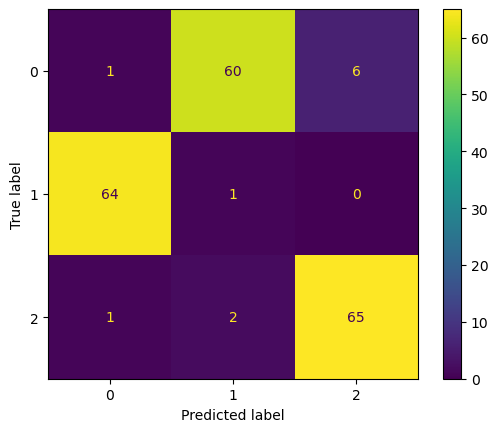

In [15]:
#ConfusionMatrixDisplay(cm, display_labels = lbls).plot(ax = axs[0], xticks_rotation = 90.0, values_format = '.2f', cmap = 'GnBu')
ConfusionMatrixDisplay(cm).plot();

- Si tornem a executar el que no estem controlant és el random state inicial. 
- Depen de com començem acabarà diferent. 
- Està girant les etiquetes. 
- El que nosaltres li diem 1 ell li diu 2.
- El que s'hauría d'haber dit 0 té un altre nom.

#### k-means implementation

In [16]:
class kamins():
    
    def __init__(self, k):
        
        # Nombre de clusters. 
        self.k = k
    
    # Xtrain, dades d'on volem trobar els centroides
    # Max iteracions que podem fer, per defecte 100
    def fit(self, Xtrain, maxIterations = 100):
        
        # pick random centrodis
        # És el maxim per columnes (per tenir-ho per cada atribut)
        # Cada dimensió té el seu rang de dades
        rangeX = Xtrain.max(axis = 0) -Xtrain.min(axis = 0)
        
        # cada min sumem el rang perque després al fer el random tinguem el punt dins el rang.
        # Això ho fem per les 5 a la vegada. 
        # És obligatori que el centroide random estigui dins el rang.
        self.M = np.array([Xtrain.min(axis = 0) +rangeX *np.random.rand(Xtrain.shape[1]) for k in range(self.k)])

        # initialize array for cluster assignement
        # menys 1 perque es una etiqueta que no assignarem mai
        # Són les etiquetes finals
        S = -np.ones(Xtrain.shape[0])
        iteration = 0
        
        while iteration < maxIterations:
            # compute distances
            
            # Per cada iteració, iterem per tots els punts de Xtrain
            for i, x in enumerate(Xtrain):
                
                # Per cada punt, mira les distancies a tots els centroides
                dxM = np.array([np.sum((x -m)**2) for m in self.M])
                
                # assign cluster (al que sigui la distancia mínima)
                # asignem les etiquetes a cada punt, pintem els punts de colors
                S[i] = np.argmin(dxM)
                
            # update centroids
            for c in range(self.k):
                # Calcula els nous centroides fent la mitjana                
                # Per cada cluster 0,1,2 agafem cada un i mirem la mitjana. Calcula la mitjana que té 5 cooord
                # S == c nomès un label. Tenen les 5 columnes i fem la mitjana
                self.M[c] = np.mean(Xtrain[S == c], axis = 0)
                
            # loop, ho podriem fer mirant fins que els centroides no canvin per fer-ho més elavorat
            iteration += 1
                    
        
    def predict(self, Xtest):
        
        # Array de 1 per cada punt. Array de 800 posicions
        S = -np.ones(Xtest.shape[0])
        
        # compute distances
        for i, x in enumerate(Xtest):
            
            # Per cada punt, mira la distancia que té a tots els centroides que tenim.
            dxM = np.array([np.sum((x -m)**2) for m in self.M])
            
            # assign cluster (mirant el que està més aprop)
            S[i] = np.argmin(dxM)
        
        # return predictions
        return S

In [17]:
mykm = kamins(3)

In [25]:
Xtrain

array([[-3.14560754, -0.63285673, -2.82765415,  4.90091673,  0.26342954],
       [-1.72741461,  0.73451724, -1.89797436,  1.03014066,  0.62969969],
       [-1.18398216,  1.2461349 , -1.84159083,  0.7777883 , -2.1236046 ],
       ...,
       [ 1.55044016,  0.67867399, -2.97859103, -1.19361486, -2.50350379],
       [ 0.56575518,  0.33337197,  2.5764514 , -1.18808449,  0.185909  ],
       [ 2.18510578, -0.03945655, -2.45467806, -1.41455424,  0.04246359]])

In [27]:
Xtrain.max(), Xtrain.min()

(5.45626877030452, -5.421288454225636, 10.877557224530157)

In [40]:
rangeX = Xtrain.max(axis = 0) -Xtrain.min(axis = 0)
rangeX

array([ 7.28502914,  6.87829763, 10.87755722,  9.90782966,  5.74740049])

In [33]:
Xtrain.shape

(800, 5)

In [32]:
# Inicialitza 3 centroides random. Un centroide té 5 coordenades.
# El rangeX és perque el punt aleatori que genera estigui dins del rang de dades que tenim.
np.array([Xtrain.min() +rangeX *np.random.rand(Xtrain.shape[1]) for k in range(3)])

array([[-1.3383463 ,  4.28155387, -4.17917143,  0.17465966,  0.03964357],
       [-4.29481161,  4.64428182,  0.0131544 ,  2.77968296,  0.62950042],
       [-3.4406892 , -2.85428454,  1.16803754, -2.38865121,  4.29174959]])

In [38]:
# Crea un array de 1 amb tants punts individuals com tenim.
-np.ones(Xtrain.shape[0])[0:5]

array([-1., -1., -1., -1., -1.])

In [41]:
# Tants punts random com dimensions
np.random.rand(Xtrain.shape[1])

array([0.86394921, 0.54503344, 0.63894792, 0.43093187, 0.97462358])

---

In [18]:
%time mykm.fit(Xtrain, maxIterations = 50)

CPU times: total: 953 ms
Wall time: 988 ms


In [19]:
Ypred = mykm.predict(Xtest)

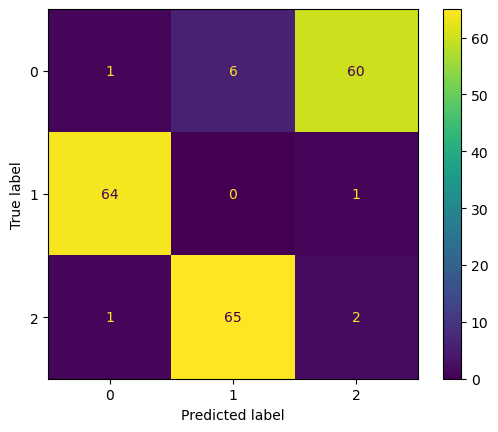

In [20]:
cm = confusion_matrix(Ytest, Ypred)
ConfusionMatrixDisplay(cm).plot();